In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, OneHotEncoder
# from category_encoders import TargetEncoder
# from category_encoders.one_hot import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from scipy.stats import skew

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#### ideas 
* solve numrical pipline issue
* expriement using different models
* see distribution of nmrical data
* see which scalar it use 
* apply PCA

In [3]:
# target is SalePrice
df = pd.read_csv("D:/(1)Projects 2.0/dvc_learn/house_prices/train.csv")

Id = df["Id"]
df = df.drop(["Id"], axis=1)

test =  pd.read_csv("D:/(1)Projects 2.0/dvc_learn/house_prices/test.csv")

### explore data

In [9]:
# def view(df, am=1):
#     if am == 1:
#         return pd.DataFrame({"missing(%)": np.round(df.isna().sum()/df.shape[0]*100, 2)})
#     elif am == 2:
#         return pd.DataFrame({"avilable(%)": np.round(df.notnull().sum()/df.shape[0]*100, 2)})

In [14]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
x =df.isna().sum()
x[x!=0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
categorical_columns = df.columns[df.dtypes == 'object']
numerical_columns = df.columns[df.dtypes != 'object']

categorical_df = df[categorical_columns]
numerical_df = df[numerical_columns]

### categorical data

In [4]:
categorical_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [5]:
def view(data):
    data_info = pd.DataFrame({"missing":data.isna().sum(),
    "missing(%)": np.round(data.isna().sum()/data.shape[0]*100, 2),
    "unique":data.nunique(),
    "avail": data.notna().sum()
    })
    return data_info                 

In [8]:
categ_info = view(categorical_df)
categ_info

,missing,missing(%),unique,avail
MSZoning,0,0.00,5,1460
Street,0,0.00,2,1460
Alley,1369,93.77,2,91
LotShape,0,0.00,4,1460
LandContour,0,0.00,4,1460
Utilities,0,0.00,2,1460
LotConfig,0,0.00,5,1460
LandSlope,0,0.00,3,1460
Neighborhood,0,0.00,25,1460
Condition1,0,0.00,9,1460


drop categorical columns with missing values more than 50%

In [9]:
# drop missing columns
categ_drop = categ_info[categ_info["missing(%)"] >= 45].index
print("columns with missing values > 45%: ", len(list(categ_drop)))
categorical_df2 = categorical_df.drop(list(categ_drop), axis=1)

# fill nan values
categorical_df2 = categorical_df2.fillna("ffill", axis=1)
view(categorical_df2)

columns with missing values > 45%:  6


,missing,missing(%),unique,avail
MSZoning,0,0.0,5,1460
Street,0,0.0,2,1460
LotShape,0,0.0,4,1460
LandContour,0,0.0,4,1460
Utilities,0,0.0,2,1460
LotConfig,0,0.0,5,1460
LandSlope,0,0.0,3,1460
Neighborhood,0,0.0,25,1460
Condition1,0,0.0,9,1460
Condition2,0,0.0,8,1460


In [22]:
# fig, axis = plt.subplots(9,5, figsize=(10,10))
# ax = axis.flatten()

# for i, g in enumerate(categorical_df.columns):
#     sns.countplot(x=g, data=categorical_df, ax=ax[i])

#     ax[i].set_title(g)
# plt.tight_layout()

### numrical data

In [7]:
numerical_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [8]:
numerical_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
num_info = view(numerical_df)
num_info

,missing,missing(%),unique,avail
MSSubClass,0,0.00,15,1460
LotFrontage,259,17.74,110,1201
LotArea,0,0.00,1073,1460
OverallQual,0,0.00,10,1460
OverallCond,0,0.00,9,1460
YearBuilt,0,0.00,112,1460
YearRemodAdd,0,0.00,61,1460
MasVnrArea,8,0.55,327,1452
BsmtFinSF1,0,0.00,637,1460
BsmtFinSF2,0,0.00,144,1460


In [11]:
num_missing = num_info[num_info["missing(%)"] != 0]
num_missing

,missing,missing(%),unique,avail
LotFrontage,259,17.74,110,1201
MasVnrArea,8,0.55,327,1452
GarageYrBlt,81,5.55,97,1379


missing numrical values don't need to be removed

<Axes: >

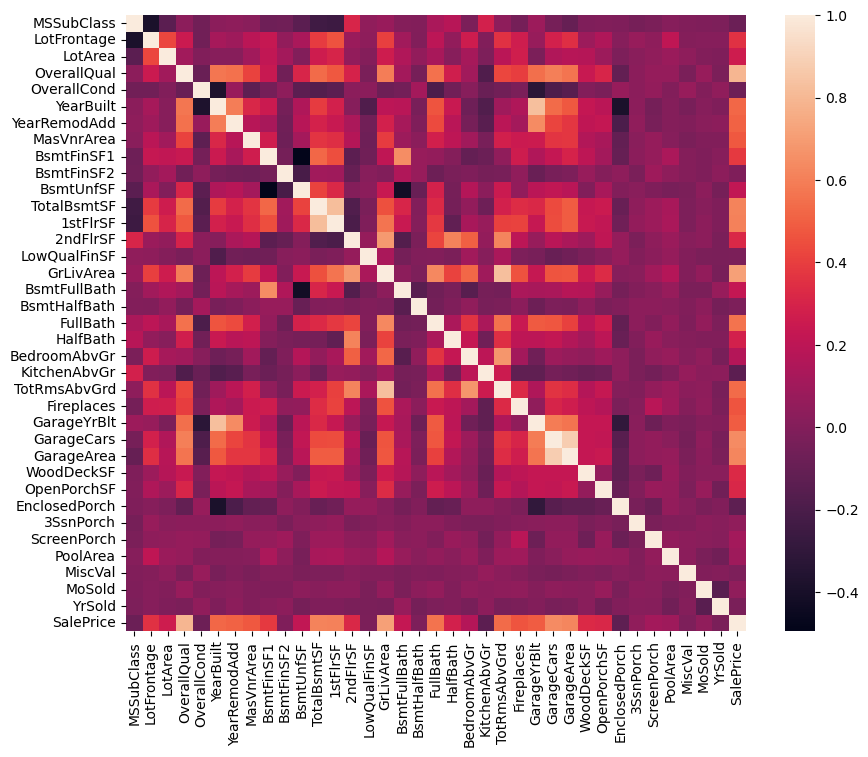

In [33]:
plt.figure(figsize=(10,8))
corr_matrix = numerical_df.corr()
#print(corr_matrix)
sns.heatmap(corr_matrix, fmt=".1f")

In [12]:
target = numerical_df["SalePrice"]
numerical_df2 = numerical_df.drop(["SalePrice"], axis=1)

### data preprocessing

In [39]:
def transform(cat, num):

    num_pipline = Pipeline([
        ("impute", SimpleImputer(strategy="median")),
        ("scale", StandardScaler())
    ])


    full_pipline = ColumnTransformer([
        ("fill", num_pipline, num.columns),
        ("encode", OneHotEncoder(sparse_output=False), cat.columns)
    ])

    data = pd.concat([cat, num], axis=1)
    final_data = full_pipline.fit_transform(data)

    return final_data

In [40]:
train_ready = transform(categorical_df2, numerical_df2)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(train_ready, target, test_size=0.2, random_state=42)

In [45]:
rand_forset = RandomForestRegressor()
reg_model = LinearRegression()

In [46]:
grid_forset = {
    "n_estimators":[50, 100, 200, 300, 500],
    "max_features":["sqrt", "log2", 0.5, None],
    "max_depth":[5, 10, 15, 20, 30],
    "min_samples_split":[2, 5, 10]
}

grid_search = GridSearchCV(estimator=rand_forset, param_grid=grid_forset, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

print("All Cross-validated Scores:", -grid_search.cv_results_['mean_test_score'])
print("-"*20)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validated Score:", grid_search.best_score_)

All Cross-validated Scores: [1.40063668e+09 1.34683722e+09 1.37338029e+09 1.37420941e+09
 1.36664993e+09 1.35761624e+09 1.36016494e+09 1.36056543e+09
 1.36446865e+09 1.36525833e+09 1.40504003e+09 1.37554738e+09
 1.37286275e+09 1.36903925e+09 1.36243625e+09 1.72038741e+09
 1.71499728e+09 1.70441154e+09 1.71388446e+09 1.70853098e+09
 1.74271041e+09 1.71449863e+09 1.71064391e+09 1.70644189e+09
 1.71403724e+09 1.74986871e+09 1.71177570e+09 1.69884024e+09
 1.70376682e+09 1.70533095e+09 1.12947520e+09 1.11602447e+09
 1.12028063e+09 1.10343661e+09 1.09559095e+09 1.14276006e+09
 1.08681601e+09 1.09208136e+09 1.10886753e+09 1.10852747e+09
 1.15592004e+09 1.09632154e+09 1.08571189e+09 1.10043959e+09
 1.10344989e+09 1.20629149e+09 1.13362917e+09 1.14132497e+09
 1.16589146e+09 1.15255807e+09 1.14752739e+09 1.17237892e+09
 1.14531089e+09 1.14367392e+09 1.15195519e+09 1.14700336e+09
 1.12620706e+09 1.16508145e+09 1.15181614e+09 1.13426369e+09
 1.07193183e+09 1.00847236e+09 1.02155575e+09 1.00854217e